In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
weather_data = pd.read_csv('/1. Weather Data.csv')

In [7]:
weather_data.shape

(8784, 8)

In [8]:
weather_data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


In [10]:
weather_data.isnull().sum().sum()

0

In [11]:
duplicate_weather_values = weather_data[weather_data.duplicated()]
print(duplicate_weather_values)

Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []


In [12]:
weather_data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


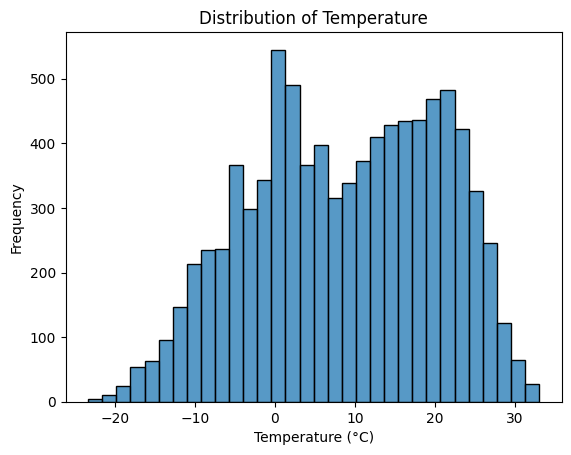

In [22]:

sns.histplot(weather_data['Temp_C'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

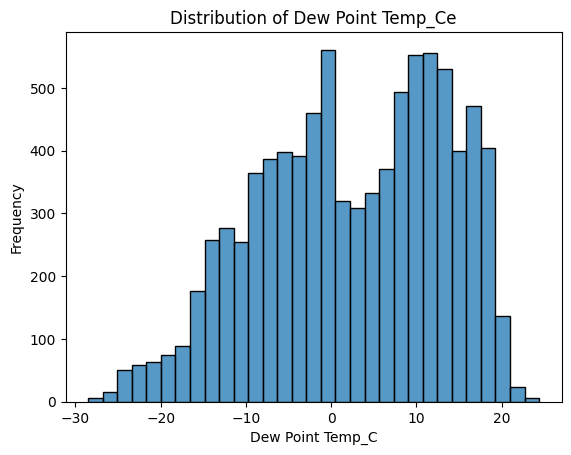

In [21]:

sns.histplot(weather_data['Dew Point Temp_C'])
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.title('Distribution of Dew Point Temp_Ce')
plt.show()

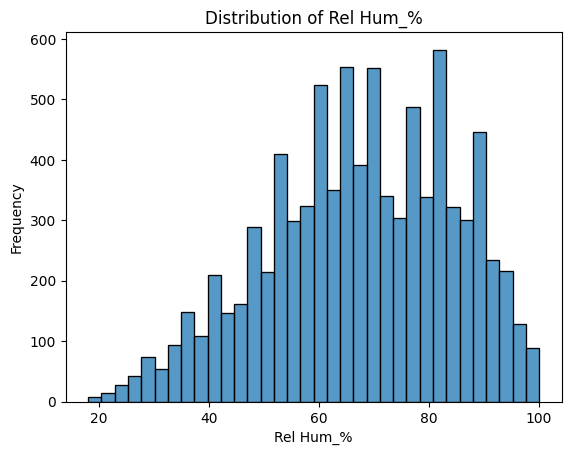

In [20]:

sns.histplot(weather_data['Rel Hum_%'])
plt.xlabel('Rel Hum_%')
plt.ylabel('Frequency')
plt.title('Distribution of Rel Hum_%')
plt.show()

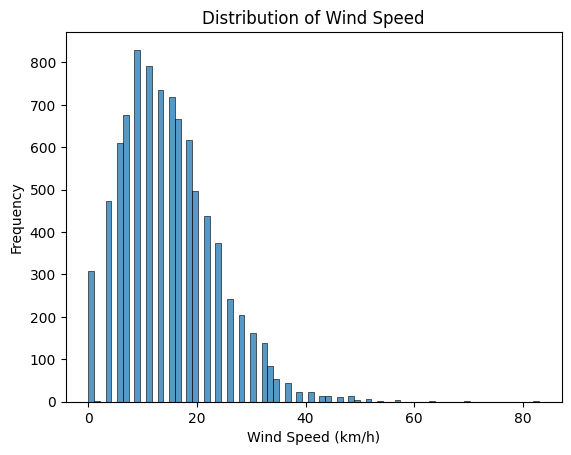

In [19]:
sns.histplot(weather_data['Wind Speed_km/h'])
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

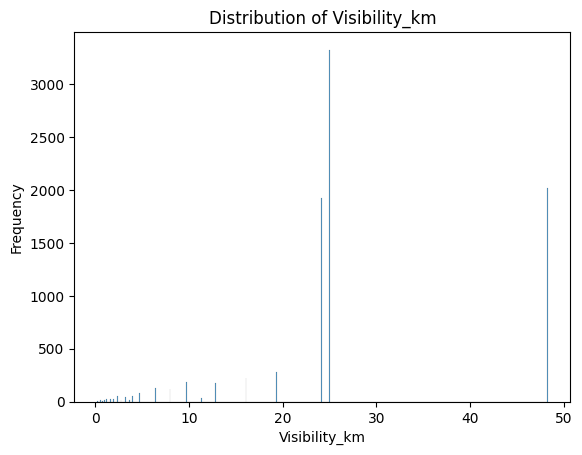

In [23]:
sns.histplot(weather_data['Visibility_km'])
plt.xlabel('Visibility_km')
plt.ylabel('Frequency')
plt.title('Distribution of Visibility_km')
plt.show()

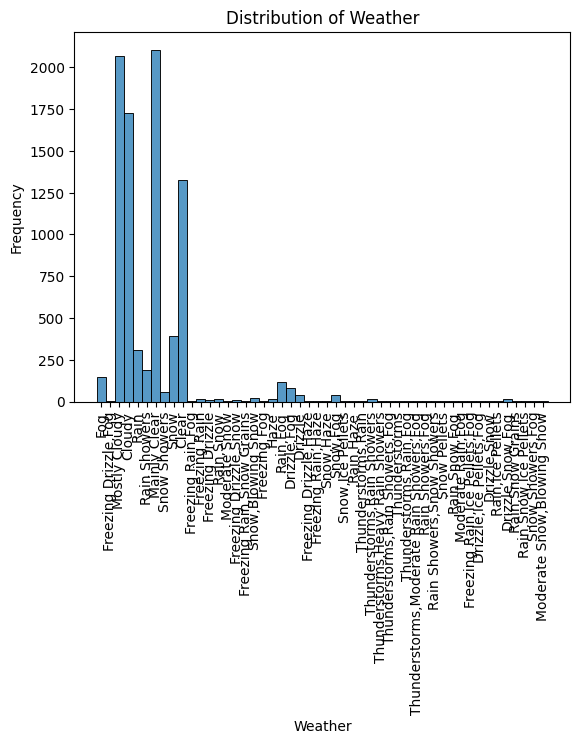

In [27]:
sns.histplot(weather_data['Weather'])
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Distribution of Weather')
plt.xticks(rotation=90)
plt.show()

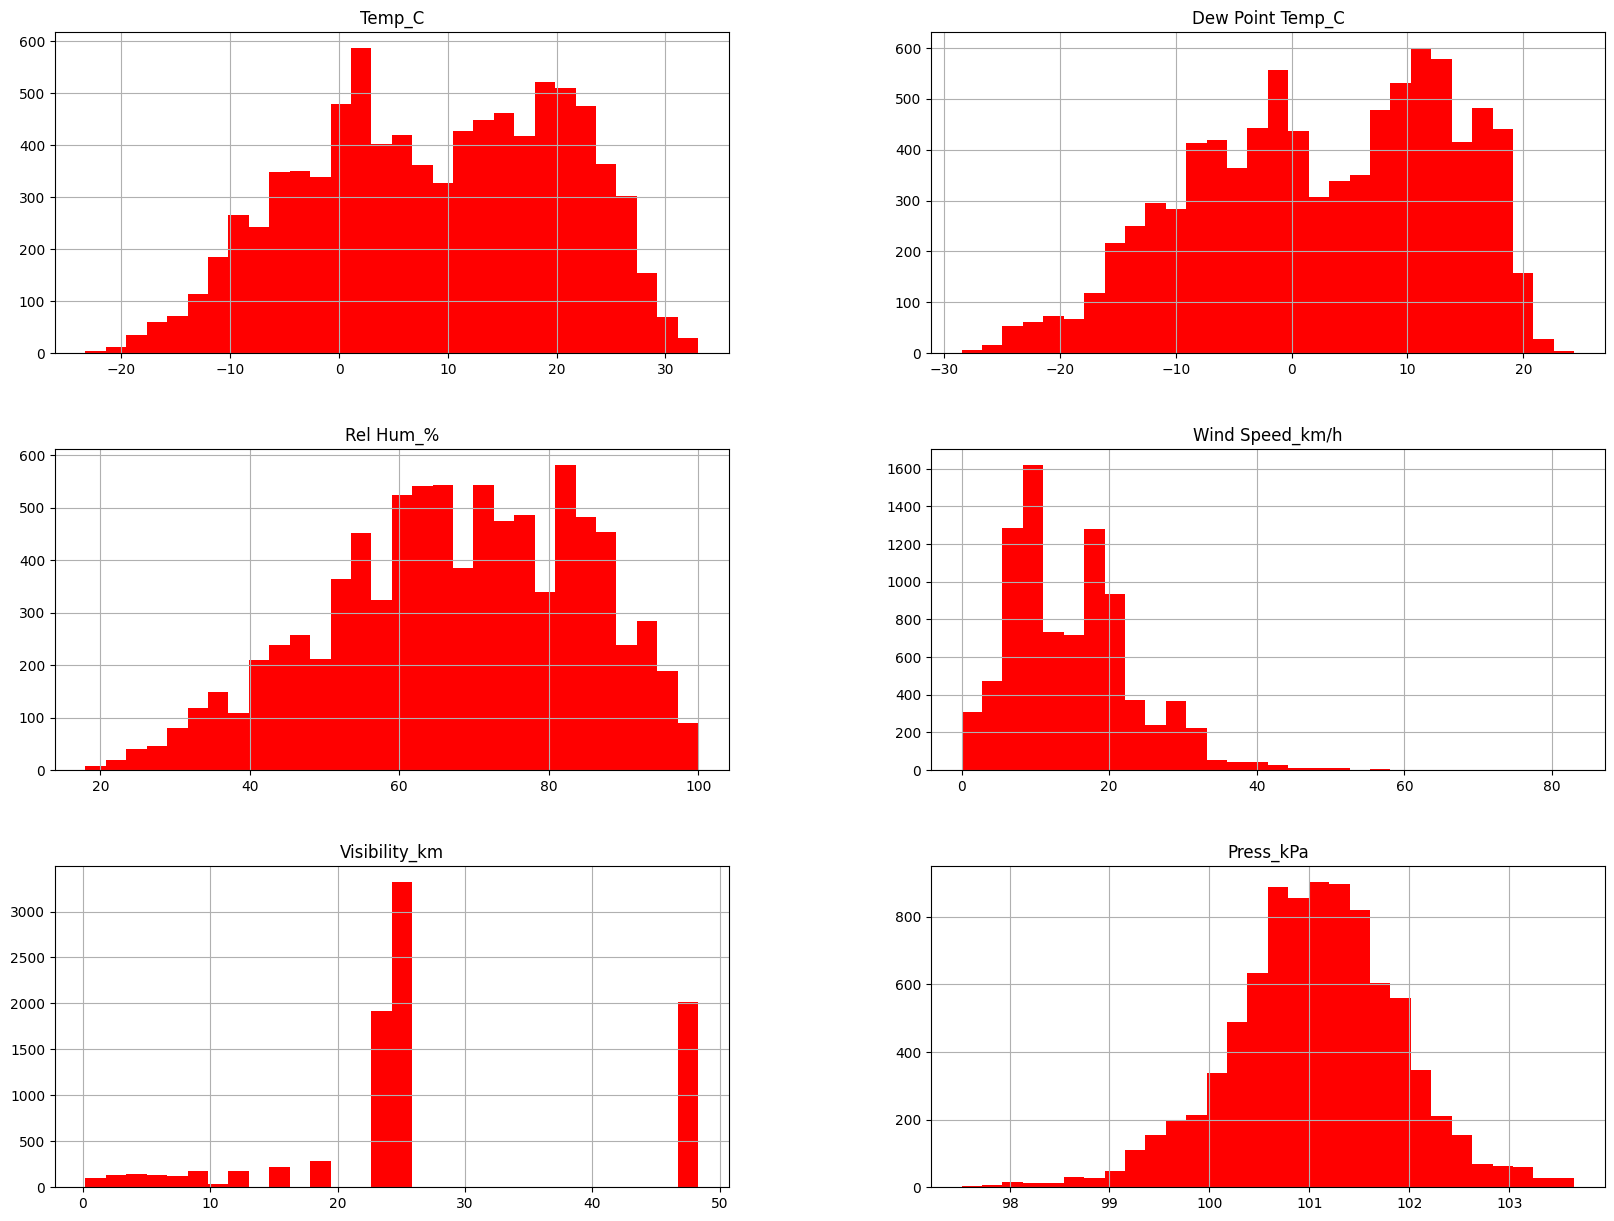

In [54]:
weather_data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km','Press_kPa', 'Weather']].hist(bins = 30, figsize = (20,15), color = 'r')
plt.show()

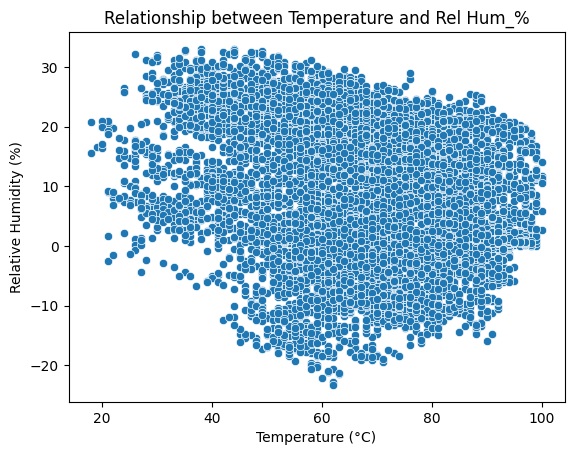

In [34]:

sns.scatterplot(y = 'Temp_C',x = 'Rel Hum_%', data = weather_data)
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.title('Relationship between Temperature and Rel Hum_%')
plt.show()

In [ ]:
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather

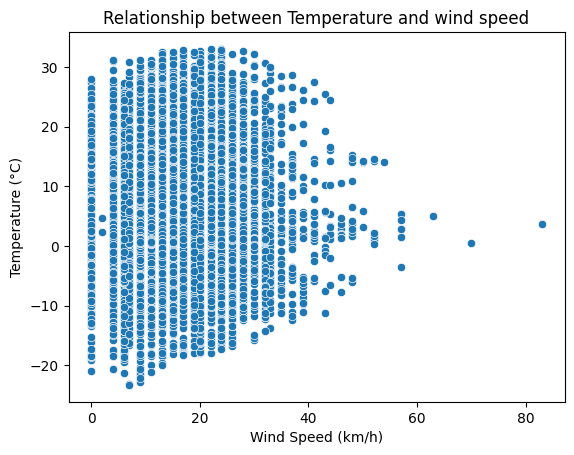

In [38]:

sns.scatterplot(y = 'Temp_C',x = 'Wind Speed_km/h', data = weather_data)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.title('Relationship between Temperature and wind speed')
plt.show()

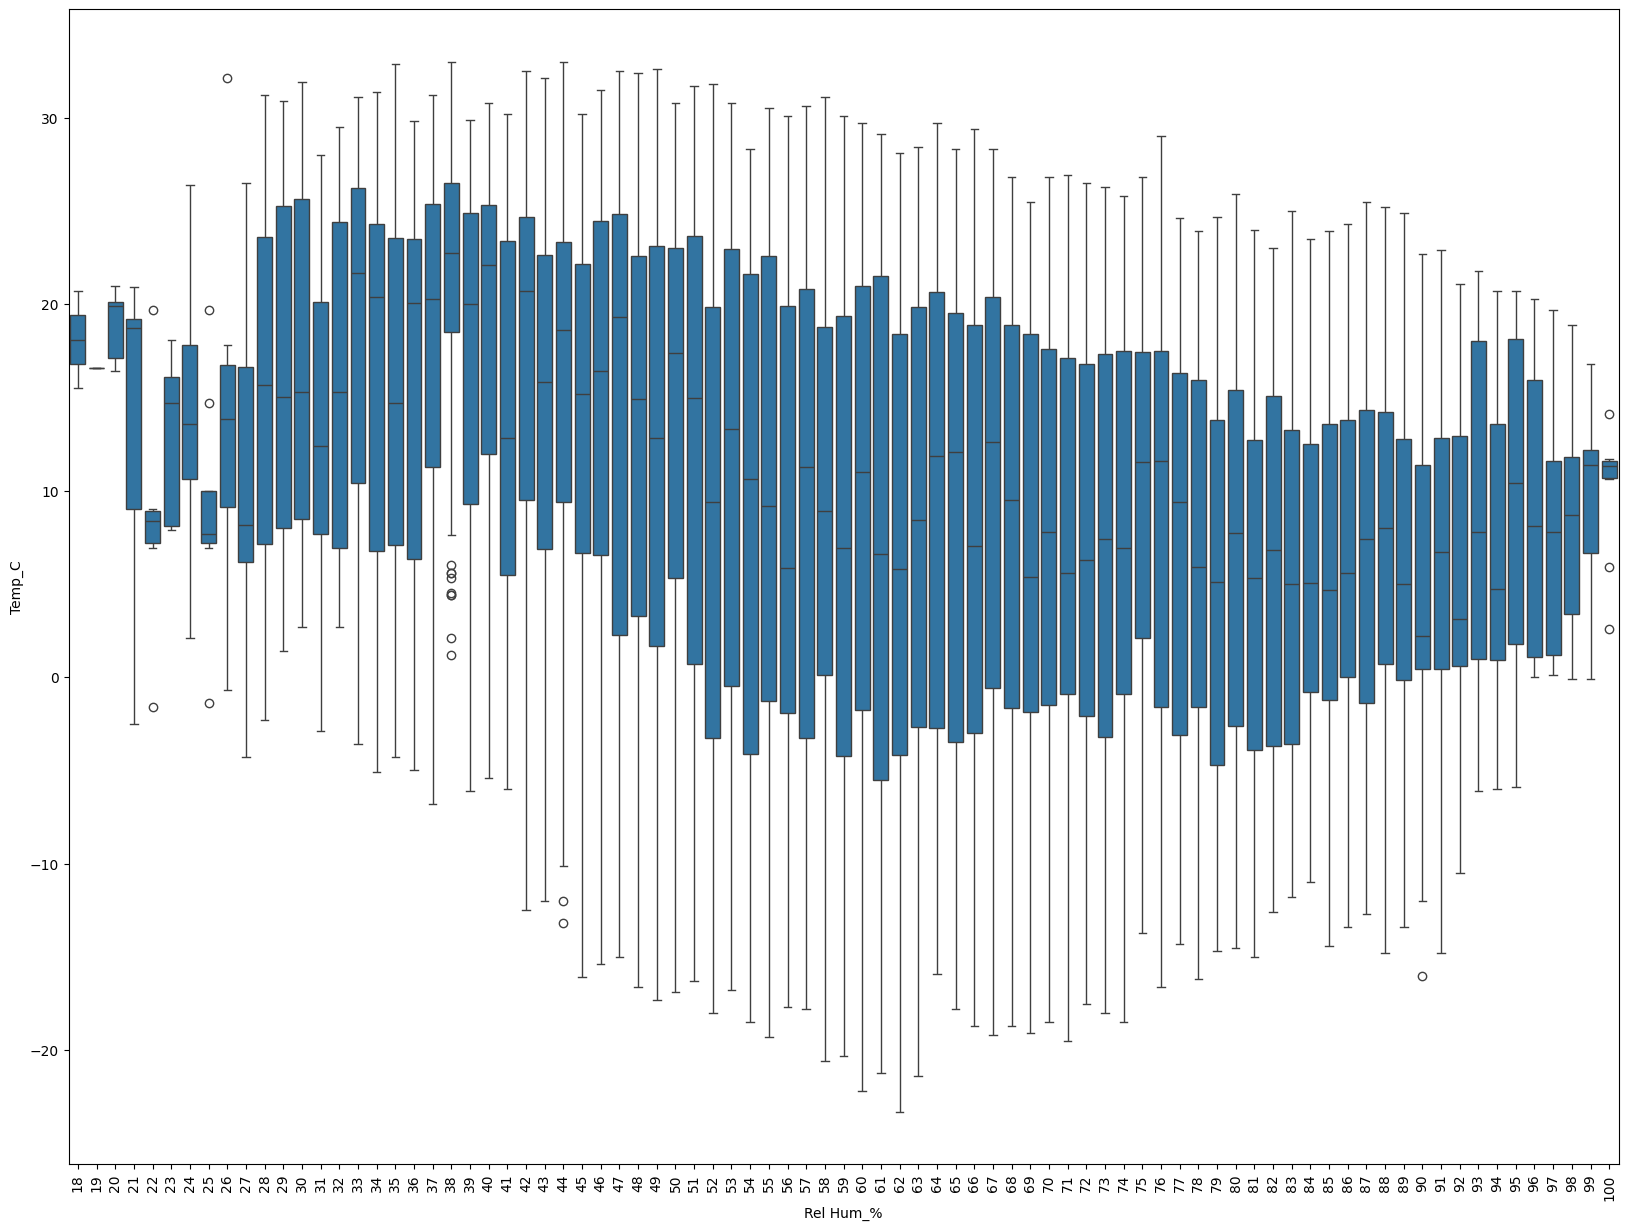

In [47]:
plt.figure(figsize=(20, 15))
sns.boxplot(x='Rel Hum_%', y='Temp_C', data=weather_data)
plt.xticks(rotation=90)
plt.show()

In [56]:
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time']).dt.date

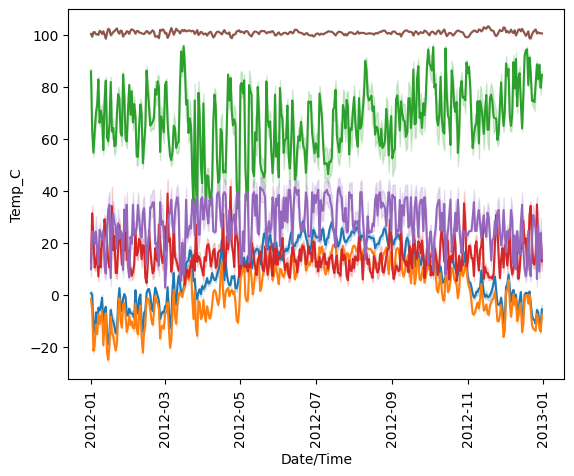

In [57]:
sns.lineplot(x='Date/Time', y='Temp_C', data=weather_data)
sns.lineplot(x='Date/Time', y='Dew Point Temp_C', data=weather_data)
sns.lineplot(x = 'Date/Time', y ='Rel Hum_%', data = weather_data)
sns.lineplot(x = 'Date/Time', y = 'Wind Speed_km/h', data = weather_data)
sns.lineplot(x = 'Date/Time', y = 'Visibility_km', data = weather_data)
sns.lineplot(x = 'Date/Time', y = 'Press_kPa', data = weather_data)
plt.xticks(rotation=90)

plt.show()

In [62]:
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])
weather_data['Temp_C'] = pd.to_numeric(weather_data['Temp_C'], errors='coerce')
weather_data['Rel Hum_%'] = pd.to_numeric(weather_data['Rel Hum_%'], errors='coerce')
weather_data['Wind Speed_km/h'] = pd.to_numeric(weather_data['Wind Speed_km/h'], errors='coerce')
weather_data['Visibility_km'] = pd.to_numeric(weather_data['Visibility_km'], errors='coerce')
weather_data['Press_kPa'] = pd.to_numeric(weather_data['Press_kPa'], errors='coerce')
weather_data['Month'] = weather_data['Date/Time'].dt.month
weather_data['Day'] = weather_data['Date/Time'].dt.day
weather_data['Year'] = weather_data['Date/Time'].dt.year

In [63]:
monthly_Average = weather_data.groupby('Month').mean(numeric_only = True)

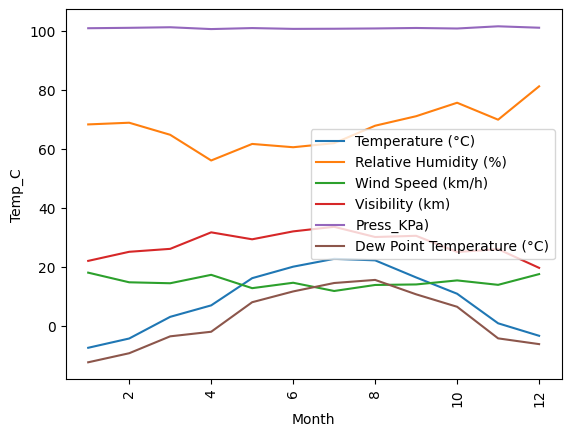

In [66]:
sns.lineplot(data=monthly_Average, x='Month', y='Temp_C', label = 'Temperature (°C)')
sns.lineplot(data=monthly_Average, x='Month', y='Rel Hum_%', label = 'Relative Humidity (%)')
sns.lineplot(data=monthly_Average, x='Month', y='Wind Speed_km/h',label = 'Wind Speed (km/h)')
sns.lineplot(data=monthly_Average, x='Month', y='Visibility_km', label = 'Visibility (km)')
sns.lineplot(data=monthly_Average, x='Month', y='Press_kPa', label = 'Press_KPa)' )
sns.lineplot(data=monthly_Average, x='Month', y='Dew Point Temp_C', label = 'Dew Point Temperature (°C)')
xlabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ylabels = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (kPa)', 'Dew Point Temperature (°C)']
plt.title = ['AVERAGE MONTHLY DATA']
plt.xticks(rotation=90)
plt.show()

TypeError: 'list' object is not callable

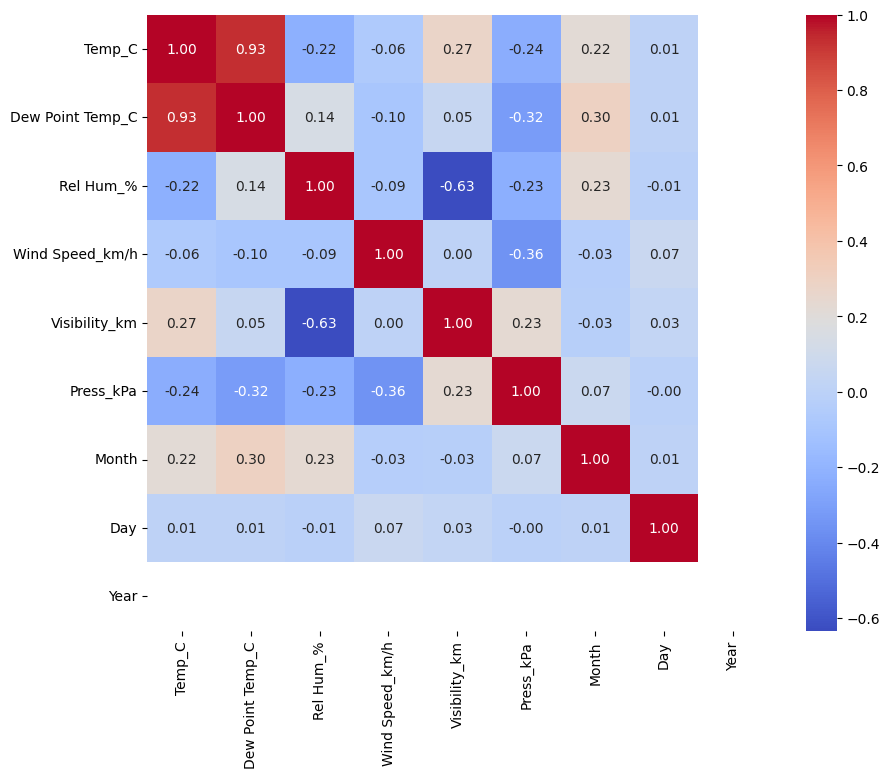

In [68]:
correlation_matrix = weather_data.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

